In [1]:
from math import ceil
from operator import itemgetter
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import time
%matplotlib inline

In [2]:
dt = 0.01
def plot_models(models, figsize=(8,8)):
    fig = plt.figure(figsize=figsize)
    ax = fig.gca(projection="3d")
    for piece in models:
            ax.plot(piece[:, 0].flatten(), piece[:, 1].flatten(), piece[:, 2].flatten(), lw=0.5)
    plt.draw()
    plt.show()

def plot_model(model, figsize=(5,5)):
    plot_models([model], figsize)


def calc_mean_lorenz(lorenz_models):
    return np.array([np.mean(lorenz_models[:,i,:], axis=0) for i in range(lorenz_models.shape[1])])


def calc_weighted_average_lorenz(lorenz_models, weights):
    return np.array([np.average(lorenz_models[:,i,:], axis=0, weights=weights) for i in range(lorenz_models.shape[1])])

def lorenz_step(coords,parameters, d =dt):
    rho, sigma, beta = parameters
    x, y, z = coords
    return coords + (np.array([sigma * (y - x), x * (rho - z) - y, x * y - beta * z])* dt)

def generate_lorenz(x=1, y=1, z=1, sigma=10.0, rho=28.0, beta=8.0/3.0, start=0.0, number_of_samples=4000, plot=False):
    size = number_of_samples
    if start:
        size += ceil(start/dt)

    coords = np.empty([size,3])

    # Set initial values
    coords[0] = [x,y,z]
    parameters = [rho, sigma, beta]
    for i in range(size - 1):
        coords[i+1] = lorenz_step(coords[i],parameters)
    coords= coords[-number_of_samples:]
    if plot:
        plot_model(coords)
    return coords

In [3]:
generate_lorenz()

array([[ 1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.26      ,  0.98333333],
       [ 1.026     ,  1.51756667,  0.96971111],
       ...,
       [ 1.83759386, -0.24643283, 23.78540098],
       [ 1.62919119, -0.16652129, 23.14659519],
       [ 1.44961994, -0.08578483, 22.5266397 ]])

4d-var

In [4]:
from data_assimilation import assimilate_lorenz

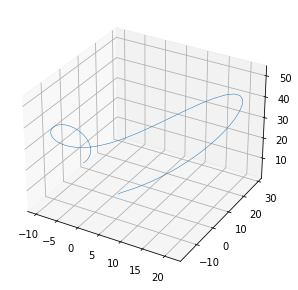

In [5]:
model = dict(
    x = 1.,
    y = 1.,
    z = 1.,
    sigma = 10.0,
    rho = 28.0,
    beta = 8.0/3.0
)

data = generate_lorenz(**model, number_of_samples=100)
plot_model(data)

In [6]:
initial = dict(
    #     x = 1.,
    # y = 1.,
    # z = 1.,
    x=data[0][0], y=data[0][1],z=data[0][2],
    sigma = 10.0,
    rho = 20.,
    beta = 5.
)
error_vector = [0.1, 0.1, 0.1, 100, 100, 100]
m1 = assimilate_lorenz(initial, data, lorenz_step, error_vector=error_vector, maximum_number_of_steps = 20)
m2 = assimilate_lorenz(initial, data, lorenz_step, error_vector=error_vector, maximum_number_of_steps = 20)
m3 = assimilate_lorenz(initial, data, lorenz_step, error_vector=error_vector, maximum_number_of_steps = 20)

  Intermediate CurrentState at the current iteration: [ 1.  1.  1. 20. 10.  5.]
  Intermediate CurrentState at the current iteration: [ 1.64308549  1.64387028  0.91657814 20.21433325 10.16079132  4.69484379]
  Intermediate CurrentState at the current iteration: [ 1.7453861   1.74943137  0.86519062 20.37835372 10.2320465   4.25732484]
  Intermediate CurrentState at the current iteration: [ 2.15458853  2.17167572  0.65964054 21.0344356  10.51706726  2.50724907]
  Intermediate CurrentState at the current iteration: [ 2.20390931  2.24143654  0.51295497 21.74537056 10.45726966  0.39515066]
  Intermediate CurrentState at the current iteration: [ 2.17466313  2.20006985  0.59993641 21.32380114 10.49272837  1.6475804 ]
  Intermediate CurrentState at the current iteration: [ 1.84755722  1.88612204  0.72683222 21.37467494 10.21185598  1.44685027]
  Intermediate CurrentState at the current iteration: [ 1.28789725  1.3769353   0.79755708 21.65635919  9.78222156  1.31245694]
  Intermediate CurrentSt

In [7]:
from data_assimilation import assimilate_lorenz_weighted

def observator(weights):
    # return weights
    aa = calc_weighted_average_lorenz(
    np.array([m1, m2, m3]),
    list(np.ravel(weights)))
    # print(aa)
    return aa

In [9]:
result = assimilate_lorenz_weighted(np.array([1.,1.,1.]), data, observator)

ValueError: during execution, the following error occurs:

tuple index out of range 

See also the potential messages, which can show the origin of the above error, in the launching terminal.


In [ ]:
weighted_avg_model = calc_weighted_average_lorenz(
    np.array([m1, m2, m3]),
    result
)

plot_models([lorenz_attr,weighted_avg_model])